### Numerical integration of Schr&ouml;dinger equation via "shooting method"

#### `pibIntegrate.ipynb` is specifically for particle-in-a-box, i.e., $U(x) = 0$.

The Schr&ouml;dinger equation is
$$ -\frac{\hbar^2}{2m}\frac{d^2 \psi}{dx^2} + 0 = E\psi.  $$

Using a dimensionless length variable
$$x^\prime \equiv x/L,$$
the Schroedinger equation becomes
$$ -\frac{\hbar^2}{2mL^2}\frac{d^2 \psi}{{dx^\prime}^2} + 0 = E\psi,  $$

or 

\begin{eqnarray}
\frac{d^2 \psi}{{dx^\prime}^2} &=& -\frac{2mL^2}{\hbar^2}\, E\psi \\
                               &=& -\frac{8mL^2\pi^2}{h^2}\, E\psi.
\end{eqnarray}
This suggests using dimensionless energy. I choose to use 

$$   E^\prime \equiv E \frac{1}{h^2/(8mL^2)}.   $$
Notice that I didn't include the factor $\pi^2$ here; it's abitrary, but some things
come out neater this way.

In these units the Schroedinger equation is 

$$ \frac{d^2 \psi}{{dx^\prime}^2} + 0 = -E^\prime \pi^2 \psi.  $$

[The analytical solution then gives $E^\prime_n = n^2$.]


The integration function uses a second order approximation for second derivative, in contrast to coupled first order equation technique used in PHYS 212.  It would be ok to use first order method.


Originally developed for PHYS 212E, March 2016<br>
Modified for Jupyter notebook, Spring 2018<br>
Slight updates December 2020

Marty Ligare

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def u(x):             # Define potential energy function
    return 0
 
def integrate(x):
    y = np.zeros(len(x))      # Initialize array for values of psi
    y[1] = dx                 # Fix value of y[1]
    for i in range(1,n-1):    # Update values of y[2], y[3], y[4], etc.
                              # Use second order approx for second deriv.
        y[i+1] = 2*y[i] - y[i-1] - dx**2*np.pi**2*(e-u(x[i]))*y[i]  
    return y  

#### Guess for value of `e` (energy)
Initial suggest guess of `e = 0.8` doesn't work; curvature too 
small.

Values of `e = 1, 4, 9, ...` give acceptable values


In [4]:
e = 0.8

<IPython.core.display.Javascript object>


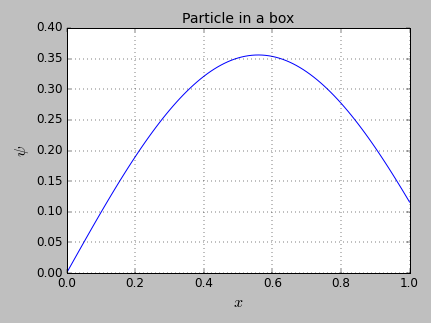

In [5]:
lep = 0                       # Left end-point 
rep = lep + 1                 # Right end-point 
n = 101                       # Number of points (number of intervals = np -1)
dx = (rep-lep)/(n-1)          # Distance between points

x = np.linspace(lep, rep, n)  # Create array of x-values
y = integrate(x)              # Create values for wavefunction
plt.plot(x,y)

plt.xlabel('$x$')      # Label for horizontal axis
plt.ylabel("$\psi$")    # Label for vertical axis
plt.title("Particle in a box")
plt.axhline(0, color='black')
plt.grid(True);


#### Version information

+ `%version_information` is an IPython magic extension for showing version information for dependency modules in a notebook;

+ See https://github.com/jrjohansson/version_information

+ `%version_information` is available on Bucknell computers on the linux network. You can easily install it on any computer.



In [6]:
%load_ext version_information

In [8]:
version_information numpy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
matplotlib 3.2.2
Mon Dec 21 11:21:17 2020 EST